In [2]:
from __future__ import division, unicode_literals

import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score

# Чтение данных

In [3]:
train = pd.read_csv('train.csv', encoding='utf-8', 
                    dialect='excel', lineterminator='\n')

assert(train.columns[-1] == 'retweet_count')

# Пример вычисления признаков

In [5]:
def df2features(df):
    return np.array([
        df['user.id'],
        df['user.followers_count'],
    ]).transpose()

train_x = df2features(train)
train_y = train['retweet_count'] > 20

# Построение модели

Пример вычисления площади под ROC-кривой на обучающей выборке.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

%matplotlib inline
import matplotlib.pyplot as plt

model_dtr = DecisionTreeClassifier()
model_lr = LogisticRegression(penalty='l1', tol=0.01) 

Кросс-валидация

In [11]:
train_x_ROC, test_x_ROC, train_y_ROC, test_y_ROC = cross_validation.train_test_split(train_x, train_y, test_size=0.2)

In [14]:
model_dtc = DecisionTreeClassifier()
model_lr = LogisticRegression(penalty='l1', tol=0.01)
kfold = 5 #количество подвыборок для валидации
itog_val = {}
scores = cross_validation.cross_val_score(model_dtc, train_x, train_y, cv = kfold)
itog_val['DecisionTreeClassifier'] = scores.mean()
scores = cross_validation.cross_val_score(model_lr, train_x, train_y, cv = kfold)
itog_val['LogisticRegression'] = scores.mean()

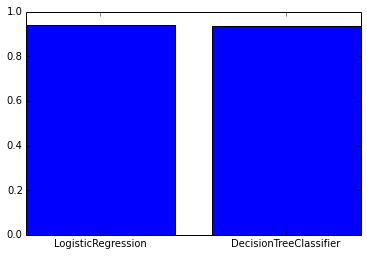

In [25]:
plt.bar(range(len(itog_val)), itog_val.values(), align='center')
plt.xticks(range(len(itog_val)), itog_val.keys())
plt.show()